Part 3: Coursework Description:
You will need to submit the following files:
• A PDF file of the report: part3report.PDF (I will check this file for marking)
• A Notebook of the code: part3coursework.ipynb (I will only check this file if I need to verify
and find evidence of the claim in the report as well as plagiarism)
Main Tasks
Implement a Convolutional Neural Network (CNN) on the CIFAR-10 dataset and solve the following
three problems using pytorch. [tentative mark distribution is given in the brackets]:
1. For the training, use early stopping and save the model that produces the best validation
results. (you will need to use a training set and a validation set) [Marks 10: 5+3+2]
2. Show the performance of your designed CNN with and without batch normalisation. Use a
convergence graph to show the difference in their performances [Marks 10: 5+5]
3. Visualise the Convolutional Features / Filters. This could be done by using imshow or similar
methods. Show how filter features change over different layers over a test image. [Marks 20:
10+10]


Design of CNN Architecture
You can design any type of CNN architecture that could have a minimum of three Conv layers and 3
FC layers. Between Conv layers, you will need to use MaxPool layers. For the batch normalisation
question (question 2), you will need to add batch normalisation layers as well.
VGG16 may take a long time to run on some laptops or may not be feasible to run on CPU.
Therefore, if your computation permits, such as having GPU, you can use a standard VGG16 as your
network. There is no harm in using simple, small CNN architecture satisfying the above constraints.
CNN training hyperparameter
There are many user-defined hyperparameters, such as batch size, learning rate, type of
optimisation, training epochs, early stopping patience, number of filters, filter size, etc. You will need
to set these parameters based on your choice. If you would like to optimise them, then you can
follow the following research article:
Taylor, R., Martino, I., & Nicosia, G. Ojha, V. (2021, November). Sensitivity analysis for deep learning:
ranking hyper-parameter influence. In 2021 IEEE 33rd International Conference on Tools with
Artificial Intelligence (ICTAI) (pp. 512-516). IEEE.


Training Dataset
You can reshape the dataset size or normalise it. This is optional.


Feature Visualisation
You must visualise both the raw trained filters and filter features on a test input of your choice.



Marks
Part 1, Part 2, and Part 3 coursework roughly have the distribution of 30%, 30%, and 40%.


Report Format
Answer each question (Task) as follows: (get an inspiration from Practical 2 and Practical 3 write that
have provided.) Page limit. Max 6 pages.
1. For the training, use early stopping and save the model that produces the best validation
results. (you will need to use a training set and a validation set) [Marks 10: 5+3+2]
Answer:
You will need to show in code snippet from how your model look like.
Mention the values of all hyperparameters you have defined yourself for the best possible results.
You need to show using a convergence graph that indicate divergence between training and
validation loss over a predefined number of epochs.
2. Show the performance of your designed CNN with and without batch normalisation. Use a
convergence graph to show the difference in their performances [Marks 10: 5+5]
Answer:
You will need to show in code snippet from how your model look like after batch normalization.
Answer to question 1 already have model without Batch normalization. Therefore, no need to repeat
that. Only show code snippet with Batch norm. You can avoid using Early Stopping (that not an
important for answering this question)
Mention the values of all hyperparameters you have defined yourself for the best possible results.
You need to show using a convergence graph that indicate performance comparing with/without
batch norm losses.
3. Visualise the Convolutional Features / Filters. This could be done by using imshow or similar
methods. Show how filter features change over different layers over a test image. [Marks 20:
10+10]
You will need to show in code snippet from how your model look like (you can use any of the model
from question 1 and question2).
Show the images of filters/kernels that you generated.
Show the test images, the filters after using test images.


### Part 1: Early Stopping & Best Model Selection
**Model Setup:**
   I define a CNN with at least 3 convolutional layers, 3 fully connected (FC) layers, and MaxPool layers in between. It is also the best hyperparameters like learning rate, batch size, optimizer, etc.
   
**Early Stopping:**
   - Implement early stopping to halt training when the validation loss stops improving over a set number of epochs (patience).
   - Track both training and validation losses.
   
**Save Best Model:**
   - Use a callback to save the model with the best validation performance.
  

100%|██████████| 170M/170M [00:03<00:00, 54.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/100], Train Loss: 1.6366, Val Loss: 1.3135
Epoch [2/100], Train Loss: 1.2321, Val Loss: 1.0924
Epoch [3/100], Train Loss: 1.0287, Val Loss: 0.9408
Epoch [4/100], Train Loss: 0.8859, Val Loss: 0.8616
Epoch [5/100], Train Loss: 0.7756, Val Loss: 0.8119
Epoch [6/100], Train Loss: 0.6928, Val Loss: 0.7798
Epoch [7/100], Train Loss: 0.6116, Val Loss: 0.7692
Epoch [8/100], Train Loss: 0.5537, Val Loss: 0.7719
Epoch [9/100], Train Loss: 0.4884, Val Loss: 0.7761
Epoch [10/100], Train Loss: 0.4386, Val Loss: 0.7954
Epoch [11/100], Train Loss: 0.3880, Val Loss: 0.7767
Epoch [12/100], Train Loss: 0.3564, Val Loss: 0.8312
Epoch [13/100], Train Loss: 0.3230, Val Loss: 0.8647
Epoch [14/100], Train Loss: 0.2914, Val Loss: 0.9101
Epoch [15/100], Train Loss: 0.2687, Val Loss: 0.9438
Epoch [16/100], Train Loss: 0.2411, Val Loss: 0.9818
Epoch [17/100], Train Loss: 0.2199, Val Loss: 1.0010
Early stopping trig

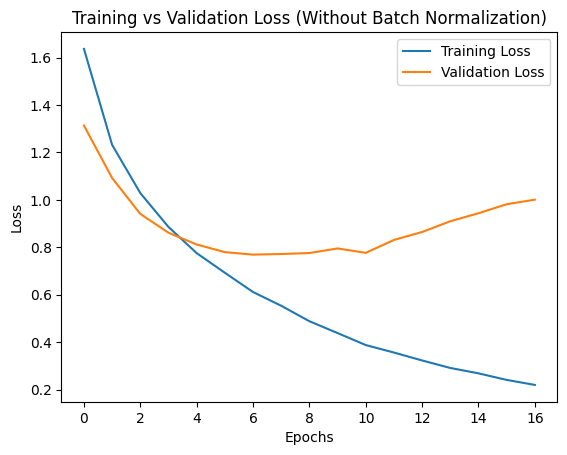

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Best Hyperparameters for With BN

num_epochs = 100
batch_size = 128
learning_rate = 0.001
early_stopping_patience = 10

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split training data into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Training with Early Stopping
class CNN(nn.Module):
    def __init__(self, use_batchnorm=False):
        super(CNN, self).__init__()
        #self.use_batchnorm = use_batchnorm
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        #self.bn1 = nn.BatchNorm2d(32) if use_batchnorm else None
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        #self.bn2 = nn.BatchNorm2d(64) if use_batchnorm else None
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        #vself.bn3 = nn.BatchNorm2d(128) if use_batchnorm else None
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        #if self.bn1: x = self.bn1(x)
        x = self.pool1(nn.ReLU()(x))

        x = self.conv2(x)
        #if self.bn2: x = self.bn2(x)
        x = self.pool2(nn.ReLU()(x))

        x = self.conv3(x)
        #if self.bn3: x = self.bn3(x)
        x = self.pool3(nn.ReLU()(x))

        x = x.view(x.size(0), -1)  # Flatten
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x


# Early stopping implementation
class EarlyStopping:
    def __init__(self, patience=10):
        self.patience = patience
        self.counter = 0
        self.best_loss = float('inf')

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

# Training loop with early stopping
def train_model(model, optimizer, criterion, train_loader, val_loader, use_batchnorm, patience=10):
    early_stopper = EarlyStopping(patience=patience)
    patience_counter = 0
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

        # Early stopping
        if early_stopper(val_loss, model):
            print("Early stopping triggered!")
            break

    return train_losses, val_losses

# Without Batch Normalization
model_without_bn = CNN(use_batchnorm=False).to(device)
optimizer_without_bn = optim.Adam(model_without_bn.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_no_bn, val_losses_no_bn = train_model(model_without_bn, optimizer_without_bn, criterion, train_loader, val_loader, use_batchnorm=False)

# Plot convergence graph
plt.plot(train_losses_no_bn, label='Training Loss')
plt.plot(val_losses_no_bn, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Without Batch Normalization)')
plt.legend()
plt.show()

### Part 2: CNN with and without Batch Normalization
 **Batch Normalization:**
   - Implement batch normalization layers after each convolutional layer.
   - Compare the performance of the model with and without batch normalization using the convergence graph.


Epoch [1/100], Train Loss: 1.4026, Val Loss: 1.1129
Epoch [2/100], Train Loss: 1.0439, Val Loss: 0.9166
Epoch [3/100], Train Loss: 0.9075, Val Loss: 0.9111
Epoch [4/100], Train Loss: 0.8120, Val Loss: 0.7618
Epoch [5/100], Train Loss: 0.7430, Val Loss: 0.7986
Epoch [6/100], Train Loss: 0.6759, Val Loss: 0.7531
Epoch [7/100], Train Loss: 0.6230, Val Loss: 0.7126
Epoch [8/100], Train Loss: 0.5752, Val Loss: 0.6702
Epoch [9/100], Train Loss: 0.5416, Val Loss: 0.7004
Epoch [10/100], Train Loss: 0.4878, Val Loss: 0.6639
Epoch [11/100], Train Loss: 0.4560, Val Loss: 0.6875
Epoch [12/100], Train Loss: 0.4188, Val Loss: 0.6852
Epoch [13/100], Train Loss: 0.3848, Val Loss: 0.6653
Epoch [14/100], Train Loss: 0.3563, Val Loss: 0.6462
Epoch [15/100], Train Loss: 0.3300, Val Loss: 0.7338
Epoch [16/100], Train Loss: 0.3065, Val Loss: 0.7073
Epoch [17/100], Train Loss: 0.2764, Val Loss: 0.7357
Epoch [18/100], Train Loss: 0.2647, Val Loss: 0.7345
Epoch [19/100], Train Loss: 0.2420, Val Loss: 0.7406
Ep

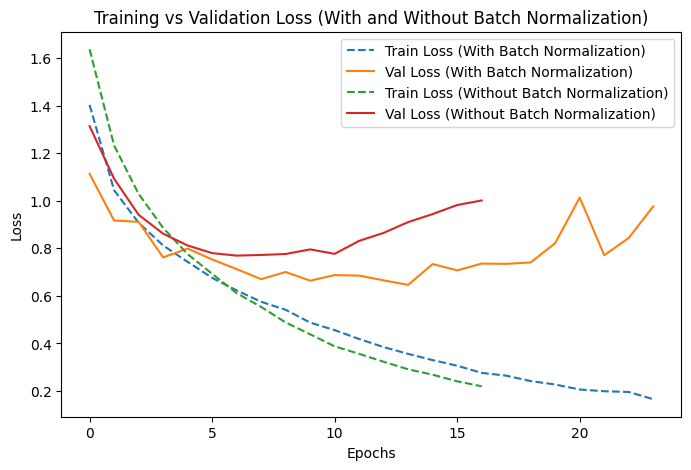

In [5]:
# Batch normalization is added to stabilize the training process.

# Code for the CNN Model (with Batch Norm)
class CNN(nn.Module):
    def __init__(self, use_batchnorm=False):
        super(CNN, self).__init__()
        self.use_batchnorm = use_batchnorm
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32) if use_batchnorm else None
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64) if use_batchnorm else None
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128) if use_batchnorm else None
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.5)


    def forward(self, x):
        x = self.conv1(x)
        if self.bn1: x = self.bn1(x)
        x = self.pool1(nn.ReLU()(x))

        x = self.conv2(x)
        if self.bn2: x = self.bn2(x)
        x = self.pool2(nn.ReLU()(x))

        x = self.conv3(x)
        if self.bn3: x = self.bn3(x)
        x = self.pool3(nn.ReLU()(x))

        x = x.view(x.size(0), -1)  # Flatten
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x


# Train and Compare Losses with/without Batch Norm

# With Batch Normalization
model_with_bn = CNN(use_batchnorm=True).to(device)
optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_losses_bn, val_losses_bn = train_model(model_with_bn, optimizer_with_bn, criterion, train_loader, val_loader, use_batchnorm=True)

# Plot differences with and without bn by convergence graphs
plt.figure(figsize=(8, 5))
plt.plot(train_losses_bn, label='Train Loss (With Batch Normalization)', linestyle='--')
plt.plot(val_losses_bn, label='Val Loss (With Batch Normalization)')
plt.plot(train_losses_no_bn, label='Train Loss (Without Batch Normalization)', linestyle='--')
plt.plot(val_losses_no_bn, label='Val Loss (Without Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (With and Without Batch Normalization)')
plt.legend()
plt.show()

### **3. Visualizing Convolutional Features/Filters**
Visualize raw filters and how they interact with a test image.



**Filter Evolution:**
   - Apply test images and visualize how the filters change over different layers.
   


<ipython-input-7-88df9f50cf1c>:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_bn.load_state_dict(torch.load('best_model.pth'))


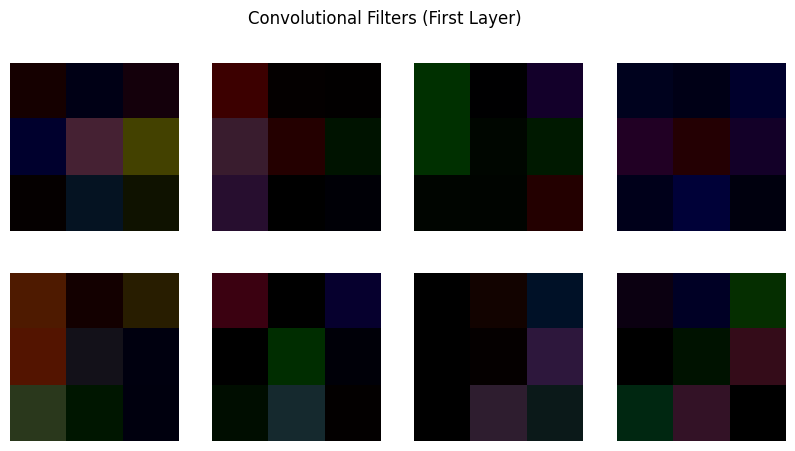

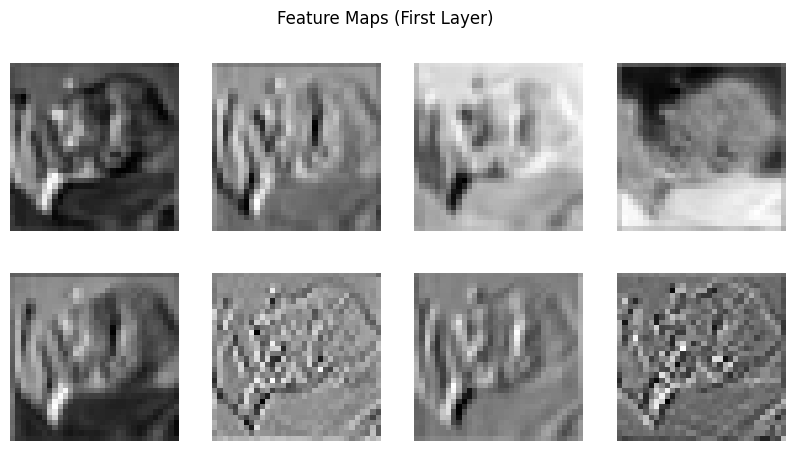

In [7]:
# Visualizing Filters

def visualize_filters(model):
    filters = model.conv1.weight.data.cpu().numpy()
    plt.figure(figsize=(10, 5))
    for i in range(8):  # Display first 8 filters
        plt.subplot(2, 4, i + 1)
        plt.imshow(filters[i].transpose(1, 2, 0))
        plt.axis('off')
    plt.suptitle("Convolutional Filters (First Layer)")
    plt.show()

def visualize_feature_maps(model, test_image, layer_index=0):
    model.eval()
    with torch.no_grad():
        test_image = test_image.to(device).unsqueeze(0)  # Add batch dimension
        # Accessing convolution layers by index
        if layer_index == 0: feature_maps = model.conv1(test_image)
        elif layer_index == 1: feature_maps = model.conv2(model.pool1(nn.ReLU()(model.conv1(test_image))))
        elif layer_index == 2: feature_maps = model.conv3(model.pool2(nn.ReLU()(model.conv2(model.pool1(nn.ReLU()(model.conv1(test_image)))))))
        else:
          print("Invalid layer index.")
          return

    feature_maps = feature_maps.squeeze(0).cpu().numpy()
    # Number of feature maps to visualize
    num_feature_maps_to_visualize = min(8, feature_maps.shape[0])
    plt.figure(figsize=(10, 5))
    for i in range(num_feature_maps_to_visualize):
        plt.subplot(2, 4, i + 1)  # Adjust grid layout
        plt.imshow(feature_maps[i], cmap='gray')  # Displaying as grayscale
        plt.axis('off')
    plt.suptitle(f"Feature Maps (Layer {layer_index + 1})")
    plt.show()

# Visualizing Feature Maps

def visualize_feature_maps(model, test_image, layer_index=0):
    model.eval()
    with torch.no_grad():
        test_image = test_image.to(device).unsqueeze(0)  # Add batch dimension
        feature_maps = model.conv1(test_image)
    feature_maps = feature_maps.squeeze(0).cpu().numpy()

    plt.figure(figsize=(10, 5))
    for i in range(8):  # Display first 8 feature maps
        plt.subplot(2, 4, i + 1)
        plt.imshow(feature_maps[i], cmap='gray')
        plt.axis('off')
    plt.suptitle("Feature Maps (First Layer)")
    plt.show()

# Load the best model for visualization
model_with_bn.load_state_dict(torch.load('best_model.pth'))
visualize_filters(model_with_bn)

# Test image visualization
test_image, _ = test_dataset[0]
visualize_feature_maps(model_with_bn, test_image)

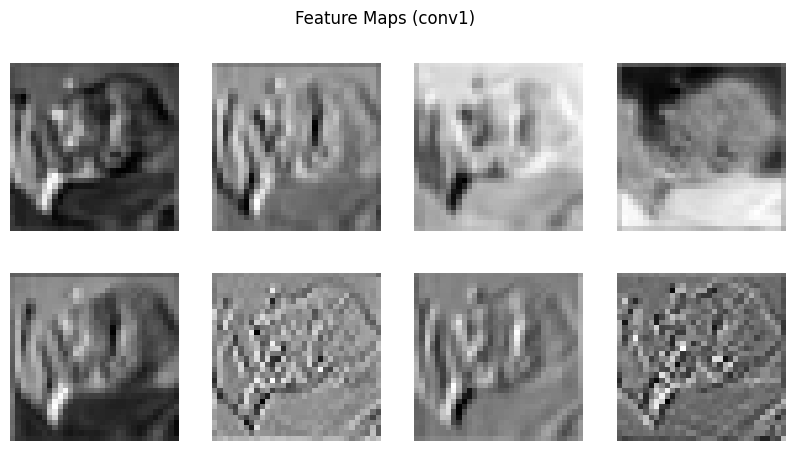

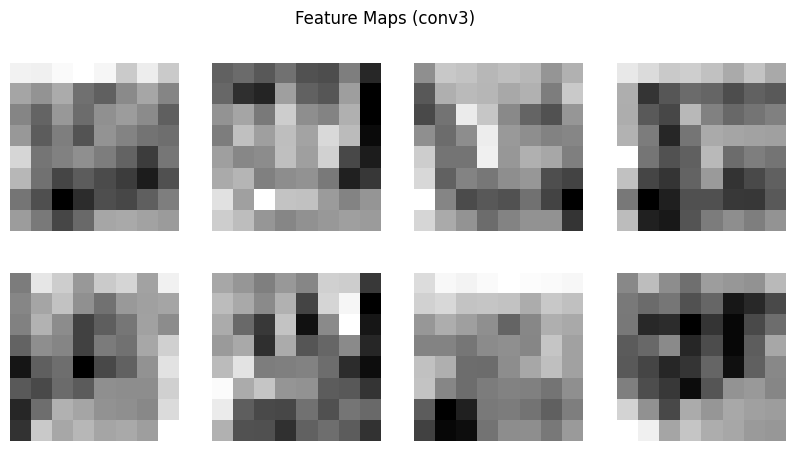

In [10]:
def visualize_feature_maps(model, test_image, layer_name):

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculations
        # Add a batch dimension to the test image
        test_image = test_image.to(device).unsqueeze(0)

        # Pass the image through the specified layer
        if layer_name == 'conv1':
            feature_maps = model.conv1(test_image)
        elif layer_name == 'conv3':
            # Pass the image through the first two convolutional layers
            # before getting the feature maps from conv3
            x = model.pool1(nn.ReLU()(model.conv1(test_image)))
            feature_maps = model.conv3(model.pool2(nn.ReLU()(model.conv2(x))))
        else:
            raise ValueError("Invalid layer name.")

        # Remove the batch dimension and move to CPU for visualization
        feature_maps = feature_maps.squeeze(0).cpu().numpy()

    # Create a figure to display the feature maps
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

    # Iterate over the first 8 feature maps and display them
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_maps[i], cmap='gray')  # Display as grayscale
        ax.axis('off')  # Turn off axis labels

    # Set the title for the figure
    fig.suptitle(f"Feature Maps ({layer_name})")

    # Show the figure
    plt.show()

    # Save the figure to a file (optional)
    # fig.savefig(f'{layer_name}_feature_maps.png')

# Get a test image
test_image, _ = test_dataset[0]

# Visualize feature maps for conv1 and conv3
visualize_feature_maps(model_with_bn, test_image, layer_name='conv1')
visualize_feature_maps(model_with_bn, test_image, layer_name='conv3')

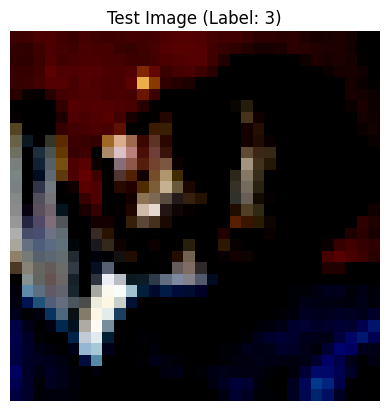

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Get a test image and its label
test_image, label = test_dataset[0]

# Display the test image
plt.imshow(test_image.permute(1, 2, 0))  # Permute to (H, W, C) for display
plt.title(f"Test Image (Label: {label})")
plt.axis('off')  # Turn off axis labels
plt.show()

# Save the test image (optional)
plt.savefig('test_image.png')